## VODAFONE CUSTOMER CHURN ANALYSIS - TEAM PRETORIA - LP2

### Data Understanding
This is a telecommunications company's customer dataset, containing various demographic and usage information for each customer, as well as whether or not they have churned (i.e. cancelled their service). Here are the meanings of the columns:

- customerID: unique identifier for each customer
- gender: customer gender (Male/Female)
- SeniorCitizen: indicates if the customer is a senior citizen or not (1, 0)
- Partner: indicates if the customer has a partner or not (Yes, No)
- Dependents: indicates if the customer has dependents or not (Yes, No)
- tenure: number of months the customer has stayed with the company
- PhoneService: indicates if the customer has a phone service or not (Yes, No)
- MultipleLines: indicates if the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: type of internet service the customer has (DSL, Fiber optic, No)
- OnlineSecurity: indicates if the customer has online security or not (Yes, No, No internet service)
- DeviceProtection: indicates if the customer has device protection or not (Yes, No, No internet service)
- TechSupport: indicates if the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: indicates if the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: indicates if the customer has streaming movies or not (Yes, No, No internet service)
- Contract: type of contract the customer has (Month-to-month, One year, Two year)
- PaperlessBilling: indicates if the customer has paperless billing or not (Yes, No)
- PaymentMethod: payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: amount charged to the customer monthly
- TotalCharges: total amount charged to the customer
- Churn: indicates if the customer has churned or not (Yes, No) 

#### SETUP

##### INSTALLING RELEVAT LIBRARIES


In [56]:
# pip install database interaction library
%pip install pyodbc
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### IMPORTATION OF LIBRARIES 

In [57]:
import pandas as pd
import pyodbc
import warnings
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#### DATA LOADING

In [58]:
# create server instance variables
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'dataAnalyst_LP2'
password = 'A3g@3kR$2y'


#Establish connection with server 
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [59]:
#Connecting to the Server
connection = pyodbc.connect(connection_string)

In [60]:
#Get data from server with query 'Select *'
query = "Select * from dbo.LP2_Telco_churn_first_3000"
sql_data = pd.read_sql(query, connection)

In [61]:
sql_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [62]:
sql_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [63]:
#read csv for remaining data from GitHub repository
data = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [64]:
#onedrive_data = pd.read_excel('Telco-churn-second-2000.xlsx')


In [65]:
#Merge dataset
voda_churn_train = pd.concat([sql_data, data])
voda_churn_train.to_csv('voda_customer_churn.csv')

#### EXPLORATORY DATA ANALYSIS 

Null Hypothesis: Customers with high monthly charges do not have the tendency to churn 

Alt Hypothesis: Customers with high monthly Charges have the tendency to churn 


Questions 
- What is the correlation between a customers tendency to churn and their internet Service 
- How many Senior Citizens with dependents chur
- What is the correlation between Customers with multiples line and their ability to churn
- Which features and services are most profitable?
- What features have the most impact on customers ability to churn

In [66]:
sql_data.shape

(3000, 21)

In [67]:
data.shape

(2043, 21)

In [68]:
voda_churn_train.shape

(5043, 21)

In [69]:
voda_churn_train.describe()

,tenure,MonthlyCharges
count,5043.000000,5043.000000
mean,32.576641,65.090214
std,24.529807,30.068133
min,0.000000,18.400000
25%,9.000000,35.775000
50%,29.000000,70.550003
75%,56.000000,90.050003
max,72.000000,118.650002


In [70]:
voda_churn_train.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [71]:
# Check duplicated values 
voda_churn_train.duplicated().sum()

0

In [72]:
voda_churn_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

#### Issues identified 
- TotalCharges column in in object instead
- No duplicates 


In [73]:
# Do describe and transpose 
voda_churn_train.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [74]:
voda_churn_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### UNIVARIATE, BIVARIATE ANALYSIS 

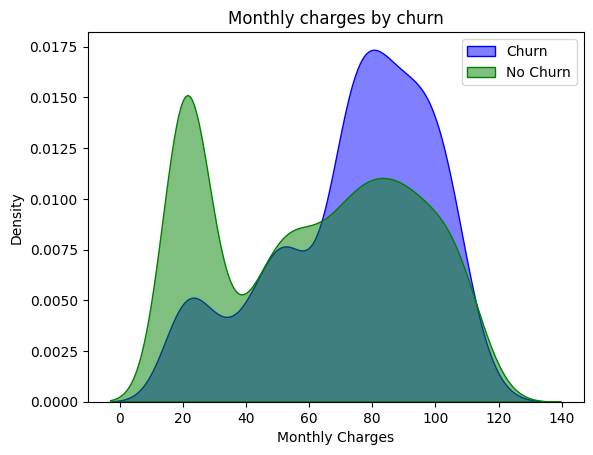

In [75]:
Mth_Chgs = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                color="Blue", fill = True, alpha=.5)
Mth_Chgs = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                ax =Mth_Chgs, color="Green", fill= True, alpha=.5)

Mth_Chgs.legend(["Churn", "No Churn"],loc='upper right')
Mth_Chgs.set_ylabel('Density')
Mth_Chgs.set_xlabel('Monthly Charges')
Mth_Chgs.set_title('Monthly charges by churn')

plt.show()


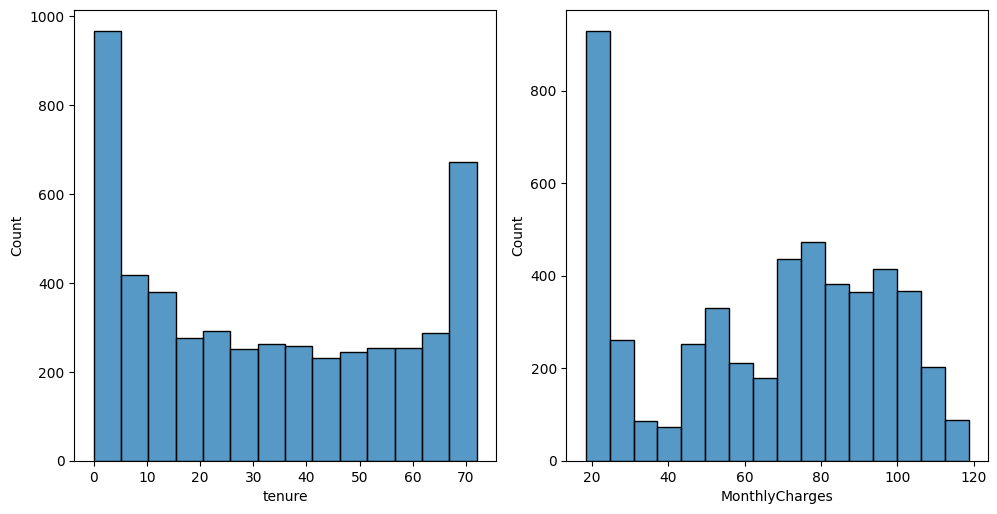

In [76]:
cols = 3
rows = 3
num_cols =voda_churn_train.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = voda_churn_train[col], ax = ax)
    
fig.tight_layout()  
plt.show()

In [77]:
# Compare rate of Churn With All the Variables 
for i, predictor in enumerate(voda_churn_train.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    fig = px.histogram(data, x=predictor, color='Churn', barmode='group',
                       color_discrete_sequence=['#1f77b4', '#aec7e8'],
                       title=f"Countplot of {predictor} by Churn")
    fig.update_layout(xaxis_title=predictor, yaxis_title="Count",
                      legend_title="Churn", height=400)
    fig.show()